#### Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime, time
import holidays
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

#### DỰ ĐOÁN BẰNG MÔ HÌNH MACHINE LEARNING: LINEAR REGRESSION, DECISION TREE, RANDOM FOREST

In [3]:
train_data = pd.read_csv('train.csv', index_col=0)  # Bỏ qua cột đầu tiên vì nó là index
X_train = train_data.drop(columns=['new_total_usage'])  # Bỏ cột 'new_total_usage' để lấy X_train
y_train = train_data['new_total_usage']  # Lấy cột 'new_total_usage' làm y_train

# Đọc dữ liệu từ test.csv
test_data = pd.read_csv('test.csv', index_col=0)  # Bỏ qua cột đầu tiên vì nó là index
X_test = test_data.drop(columns=['new_total_usage'])  # Bỏ cột 'new_total_usage' để lấy X_test
y_test = test_data['new_total_usage']  # Lấy cột 'new_total_usage' làm y_test

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (719, 12)
y_train shape: (719,)
X_test shape: (180, 12)
y_test shape: (180,)


In [10]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f'{model_name} - MAE: {mae}')
    print(f'{model_name} - MSE: {mse}')
    print(f'{model_name} - RMSE: {rmse}')
    print(f'{model_name} - MAPE: {mape}')

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.title(f'Actual vs Predicted Production ({model_name})')
    plt.show()

Random Forest - MAE: 554.6847777777493
Random Forest - MSE: 689885.597060018
Random Forest - RMSE: 830.5935209595714
Random Forest - MAPE: 23.682789598662982


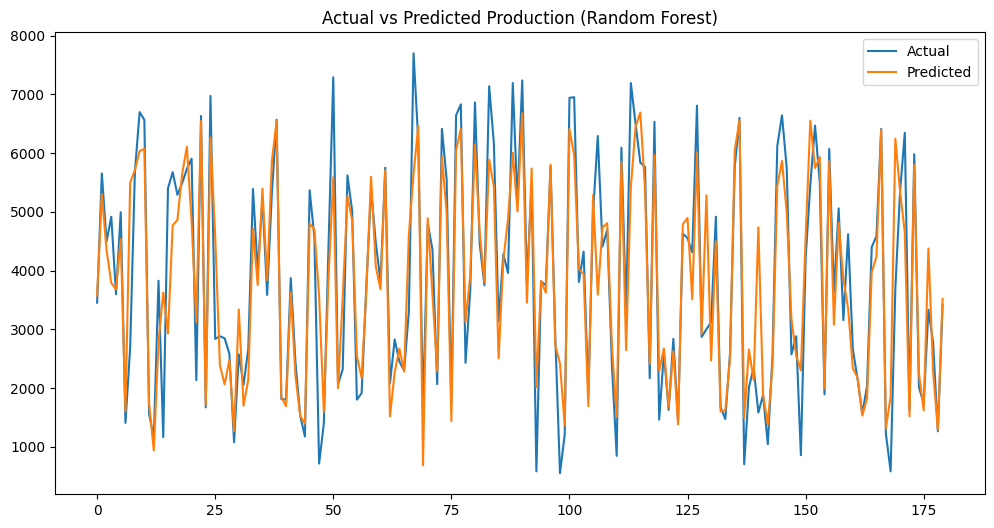

Decision Tree - MAE: 733.9444444444395
Decision Tree - MSE: 1675625.477777897
Decision Tree - RMSE: 1294.4595311472262
Decision Tree - MAPE: 28.21878880837016


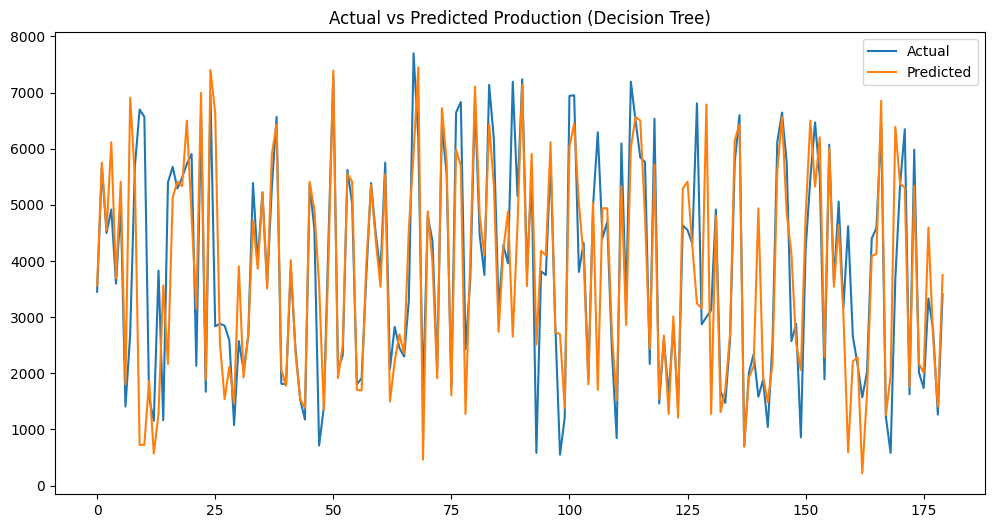

Linear Regression - MAE: 718.0217645961791
Linear Regression - MSE: 984225.2871386055
Linear Regression - RMSE: 992.0812905899422
Linear Regression - MAPE: 34.598199723229044


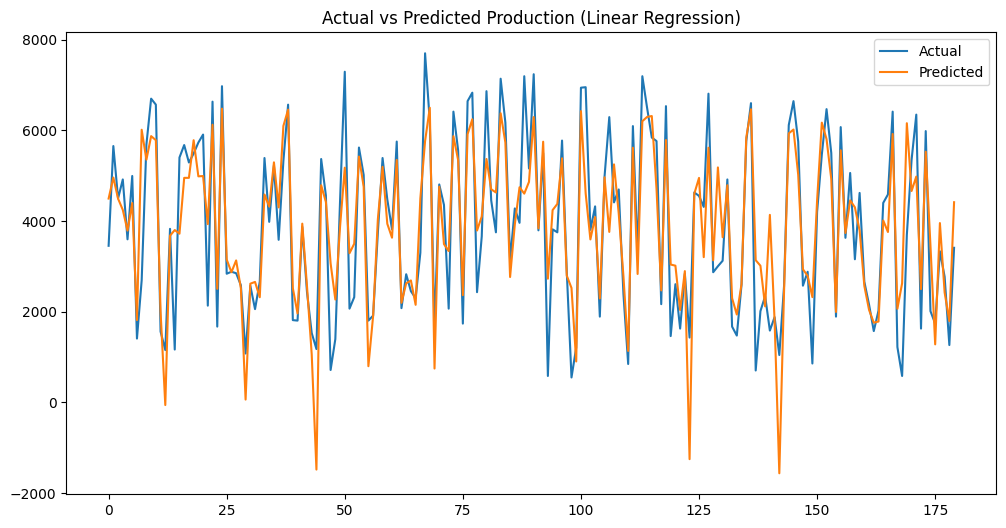

In [ ]:
#Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(random_forest_model, X_train, X_test, y_train, y_test, 'Random Forest')
# Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
evaluate_model(decision_tree_model, X_train, X_test, y_train, y_test, 'Decision Tree')

# Linear Regression
linear_regression_model = LinearRegression()
evaluate_model(linear_regression_model, X_train, X_test, y_train, y_test, 'Linear Regression')

##### Nhận xét
- Sơ bộ, các mô hình Machine Learning cho sai số rất cao, nên chuyển sang các mô hình khác 